In [47]:
import pandas as pd
import os
import matplotlib.pyplot as plt
from collections import Counter
import seaborn as sns
from sklearn.feature_extraction.text import CountVectorizer

In [6]:
df = pd.read_csv('../data/processed/cleaned_dataset.csv')
df.head()

,Unnamed: 0,text,toxicity,obscene,sexual_explicit,identity_attack,insult,threat
0,0,naturally feel urine one common expression ger...,0.2,0.0,0.2,0.0,0.0,0.0
1,1,yum love watermaple syrup together,0.0,0.0,0.0,0.0,0.0,0.0
2,2,catou wager mutual fund sale strong rrsp seaso...,0.0,0.0,0.0,0.0,0.0,0.0
3,3,shortage priest shortage vocation shortness si...,0.0,0.0,0.0,0.0,0.0,0.0
4,4,dont disagree take money deal drug street leve...,0.0,0.0,0.0,0.0,0.0,0.0


In [7]:
df = df.drop(df.columns[0], axis= 1)

In [8]:
df

,text,toxicity,obscene,sexual_explicit,identity_attack,insult,threat
0,naturally feel urine one common expression ger...,0.2,0.0,0.2,0.0,0.0,0.0
1,yum love watermaple syrup together,0.0,0.0,0.0,0.0,0.0,0.0
2,catou wager mutual fund sale strong rrsp seaso...,0.0,0.0,0.0,0.0,0.0,0.0
3,shortage priest shortage vocation shortness si...,0.0,0.0,0.0,0.0,0.0,0.0
4,dont disagree take money deal drug street leve...,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...
99971,suspect map created partisan attempt counter v...,0.0,0.0,0.0,0.0,0.0,0.0
99972,god bless dave semenko family fist steel heart...,0.0,0.0,0.0,0.0,0.0,0.0
99973,understand nt giving charity passing dollar cu...,0.0,0.0,0.0,0.0,0.0,0.0
99974,lawmaker said promising discussion next year s...,0.0,0.0,0.0,0.0,0.0,0.0


In [9]:
print(df.dtypes)

text                object
toxicity           float64
obscene            float64
sexual_explicit    float64
identity_attack    float64
insult             float64
threat             float64
dtype: object


In [12]:
numeric_col = df.select_dtypes(include=['float', 'int']).columns.tolist()
numeric_col

['toxicity',
 'obscene',
 'sexual_explicit',
 'identity_attack',
 'insult',
 'threat']

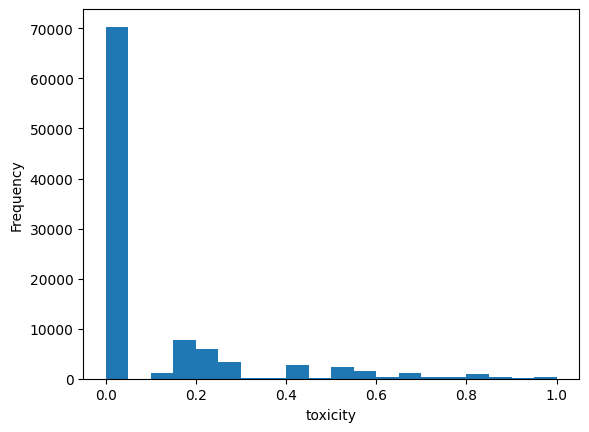

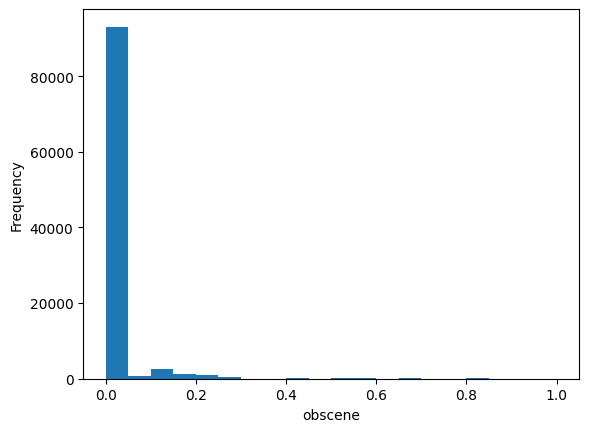

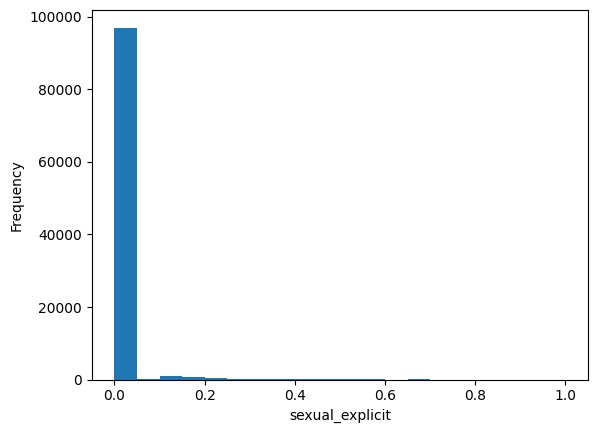

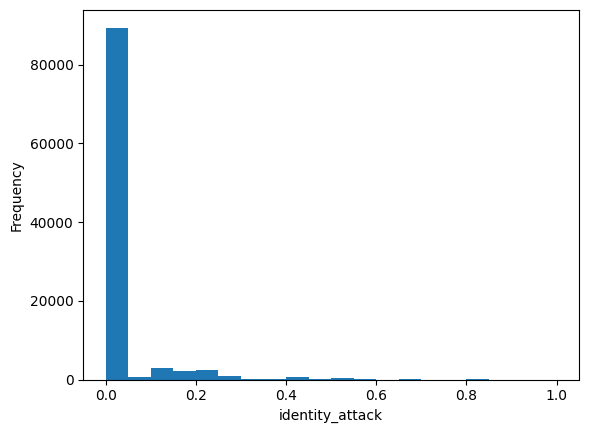

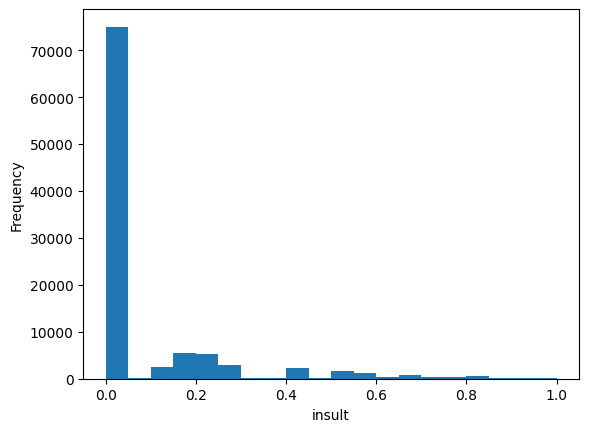

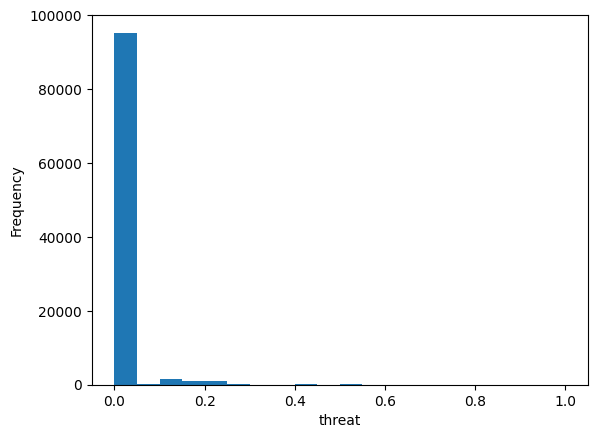

In [18]:
for col in numeric_col:
    plt.hist(x=df[col], bins = 20)
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()

In [22]:
df = df.dropna()
df['text_length'] = df['text'].apply(lambda x: len(x))
df['word_count'] = df['text'].apply(lambda x: len(x.split(' ')))
df.head()

,text,toxicity,obscene,sexual_explicit,identity_attack,insult,threat,text_length,word_count
0,naturally feel urine one common expression ger...,0.2,0.0,0.2,0.0,0.0,0.0,89,13
1,yum love watermaple syrup together,0.0,0.0,0.0,0.0,0.0,0.0,34,5
2,catou wager mutual fund sale strong rrsp seaso...,0.0,0.0,0.0,0.0,0.0,0.0,220,35
3,shortage priest shortage vocation shortness si...,0.0,0.0,0.0,0.0,0.0,0.0,66,9
4,dont disagree take money deal drug street leve...,0.0,0.0,0.0,0.0,0.0,0.0,111,18


In [23]:
print(df['text_length'].describe())
print(df['word_count'].describe())

count    99836.000000
mean       187.328038
std        172.886466
min          1.000000
25%         58.000000
50%        126.000000
75%        261.000000
max        932.000000
Name: text_length, dtype: float64
count    99836.000000
mean        27.115610
std         24.454812
min          1.000000
25%          9.000000
50%         18.000000
75%         38.000000
max        134.000000
Name: word_count, dtype: float64


In [59]:
def visualization(df, df_name):
    df['text_split'] = df['text'].apply(lambda x: x.split())
    corpus = []
    for i in range(len(df)):
        corpus += df['text_split'].iloc[i]
    mostCommon = Counter(corpus).most_common(10)
    words = []
    cnts = []
    for word, cnt in mostCommon:
        words.append(word)
        cnts.append(cnt)
    
    sns.barplot(x=cnts, y =words)
    plt.title('Top 10 Most Frequently Occuring Words in {}'.format(df_name))
    plt.show()

    # -------------
    cv = CountVectorizer(ngram_range=(2,2))
    bigrams = cv.fit_transform(df['text'])
    bigram_counts = np.asarray(bigrams.sum(axis=0)).flatten()
    ngram_freq = pd.DataFrame(sorted([(bigram_counts[i], k) for k, i in cv.vocabulary_.items()], reverse = True))
    ngram_freq.columns = ["frequency", "ngram"]
    sns.barplot(x=ngram_freq['frequency'][:10], y=ngram_freq['ngram'][:10])
    plt.title('Top 10 Most Frequently Occuring Bigrams in {}'.format(df_name))
    plt.show()

    # -------------

    cv = CountVectorizer(ngram_range=(3,3))
    trigram = cv.fit_transform(df['text'])
    trigram_counts = np.asarray(trigram.sum(axis=0)).flatten()
    ngram_freq = pd.DataFrame(sorted([(trigram_counts[i], k) for k, i in cv.vocabulary_.items()], reverse = True))
    ngram_freq.columns = ["frequency", "ngram"]
    sns.barplot(x=ngram_freq['frequency'][:10], y=ngram_freq['ngram'][:10])
    plt.title('Top 10 Most Frequently Occuring Trigram in {}'.format(df_name))
    plt.show()

In [60]:
toxicity_df = df[df['toxicity'] >= 0.3]
obscene_df = df[df['obscene'] >= 0.3]
sexual_explicit_df = df[df['sexual_explicit'] >= 0.3]
identity_attack_df = df[df['identity_attack'] >= 0.3]
insult_df = df[df['insult'] >= 0.3]
threat_df = df[df['threat'] >= 0.3]

C:\Users\Admin\AppData\Local\Temp\ipykernel_26252\2593390493.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['text_split'] = df['text'].apply(lambda x: x.split())


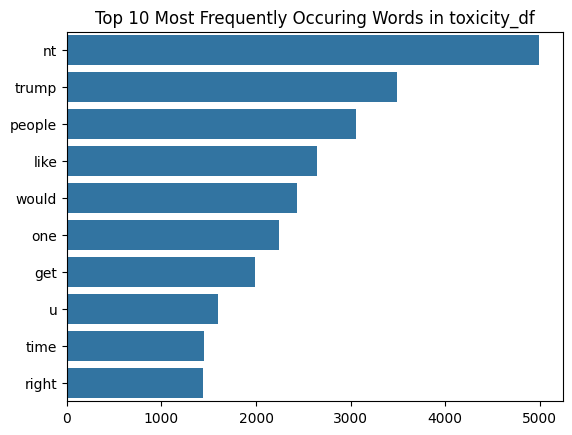

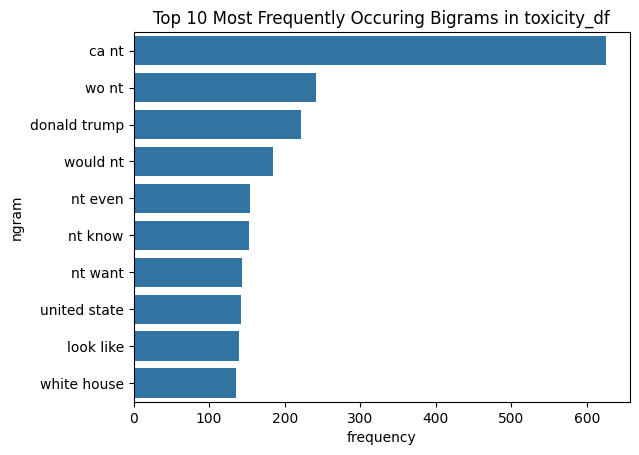

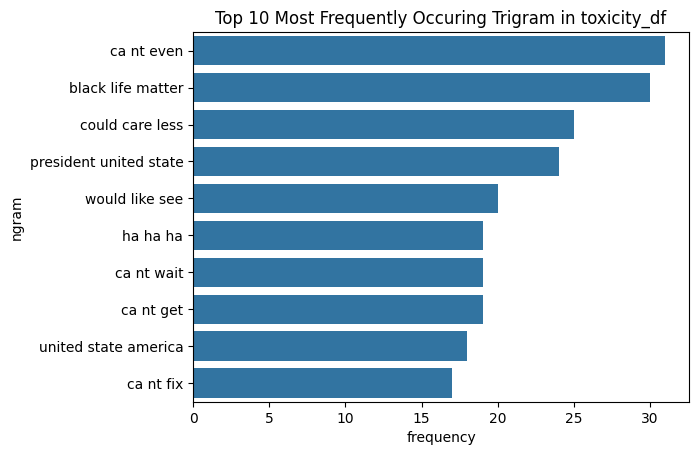

C:\Users\Admin\AppData\Local\Temp\ipykernel_26252\2593390493.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['text_split'] = df['text'].apply(lambda x: x.split())


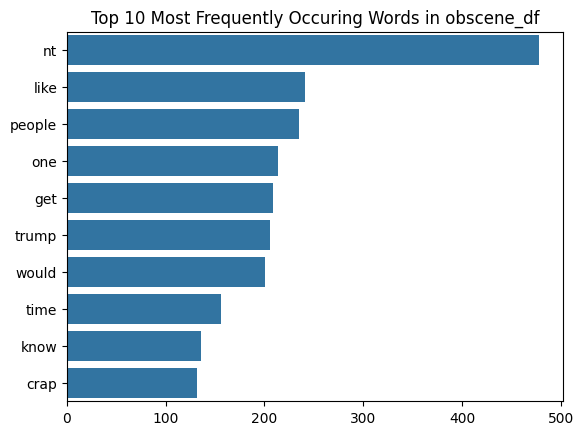

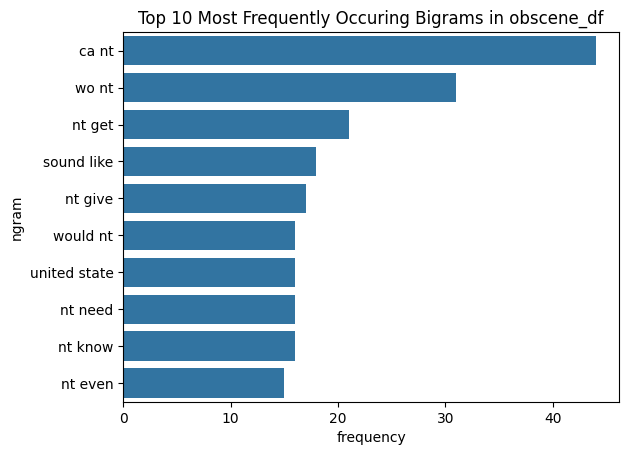

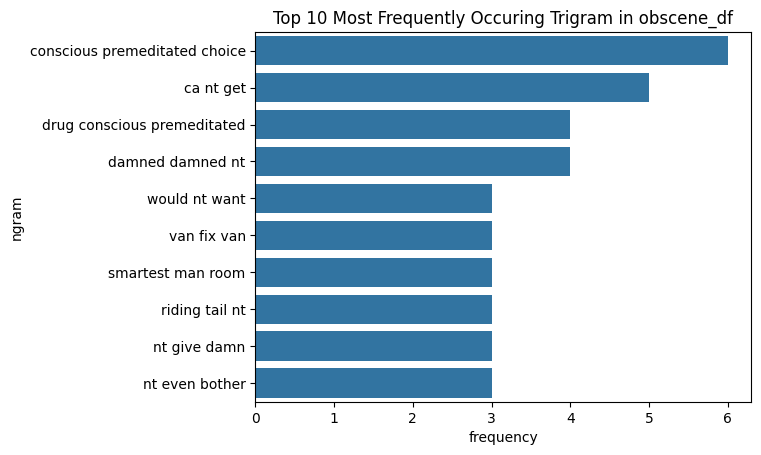

C:\Users\Admin\AppData\Local\Temp\ipykernel_26252\2593390493.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['text_split'] = df['text'].apply(lambda x: x.split())


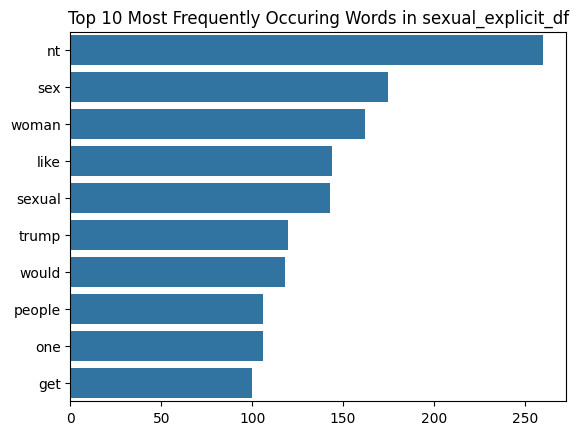

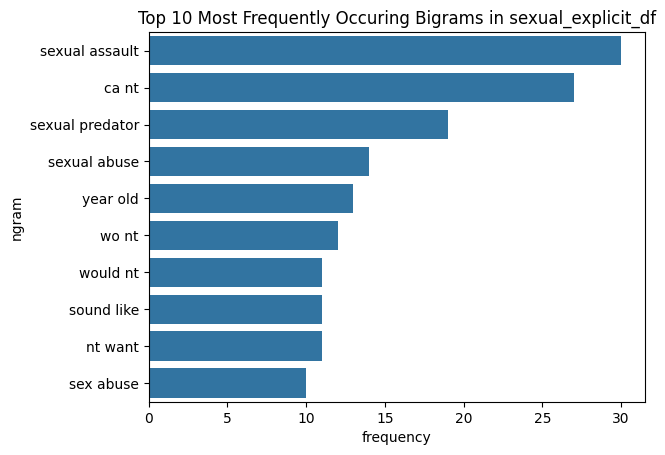

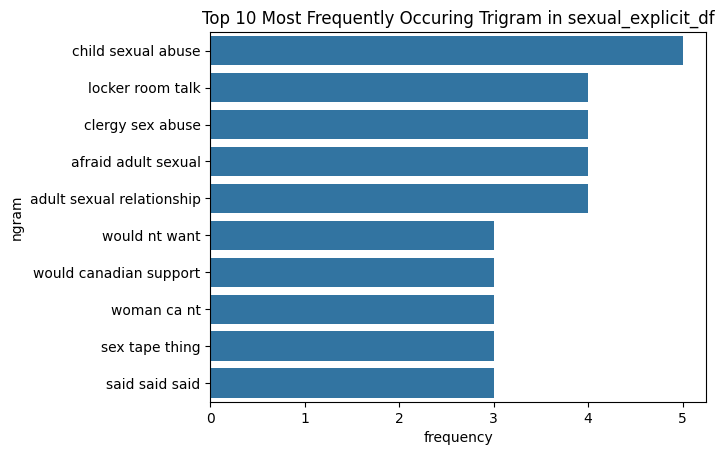

C:\Users\Admin\AppData\Local\Temp\ipykernel_26252\2593390493.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['text_split'] = df['text'].apply(lambda x: x.split())


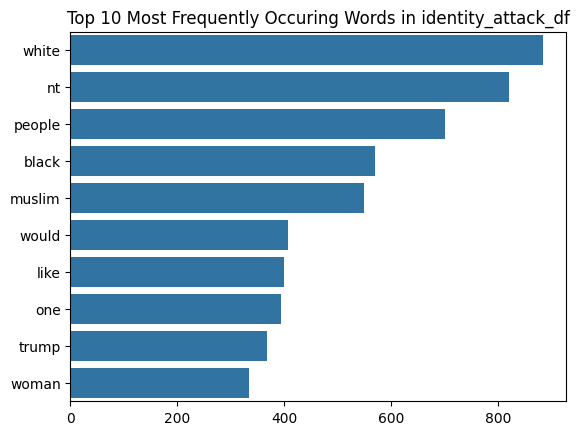

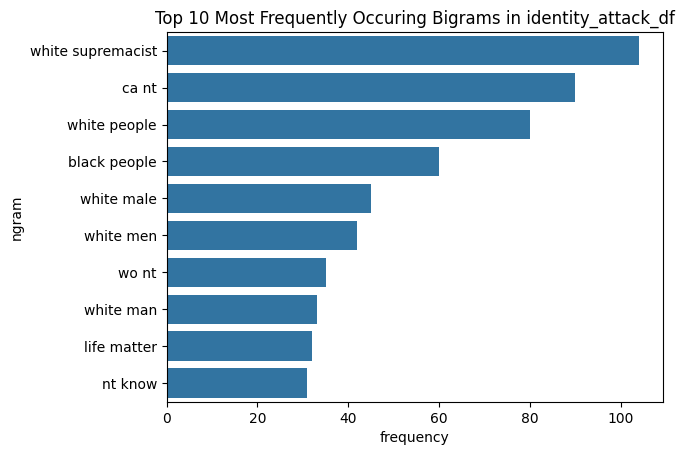

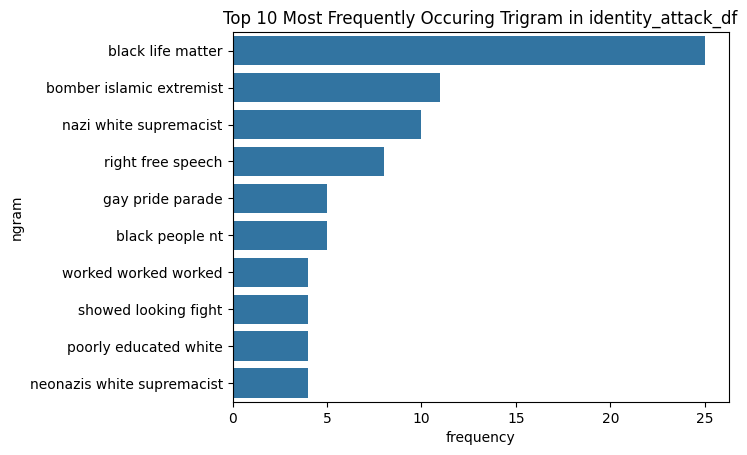

C:\Users\Admin\AppData\Local\Temp\ipykernel_26252\2593390493.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['text_split'] = df['text'].apply(lambda x: x.split())


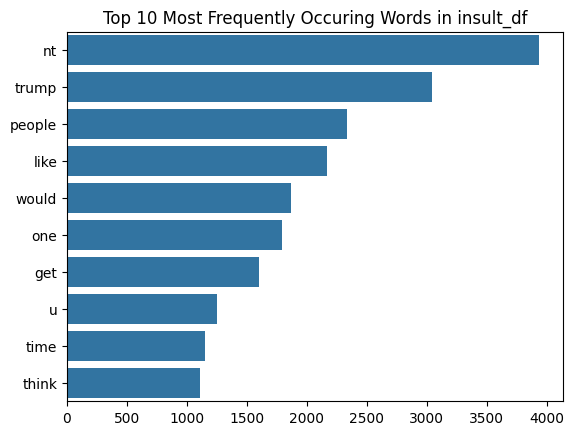

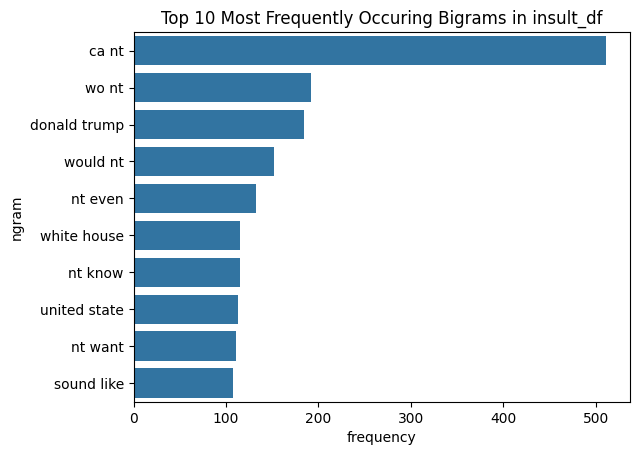

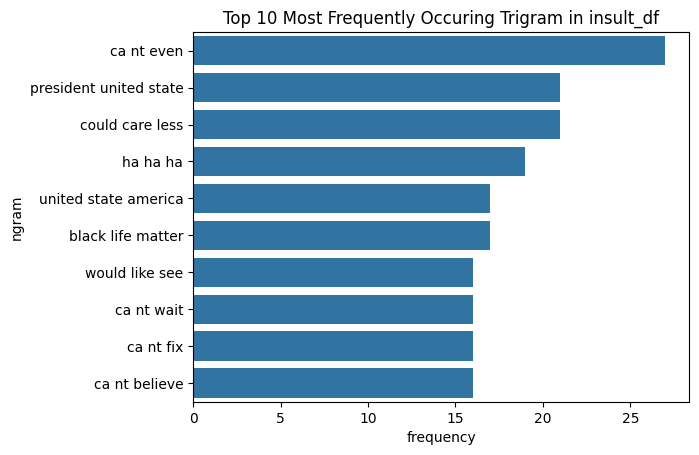

C:\Users\Admin\AppData\Local\Temp\ipykernel_26252\2593390493.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['text_split'] = df['text'].apply(lambda x: x.split())


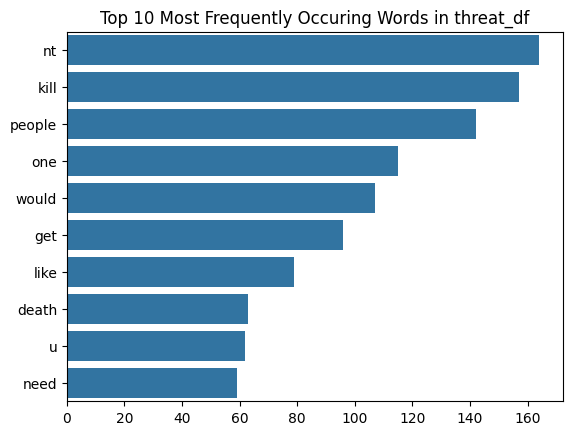

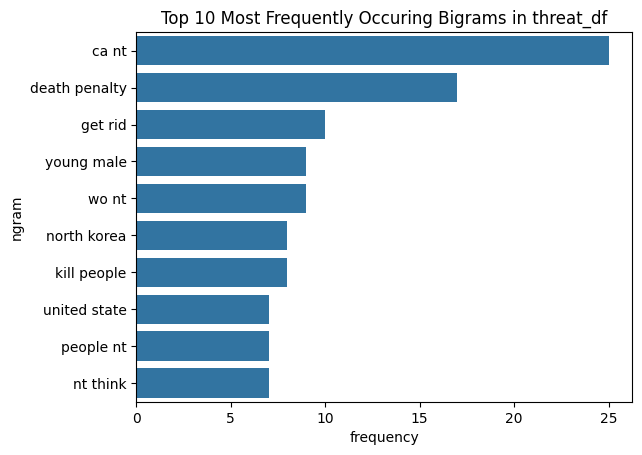

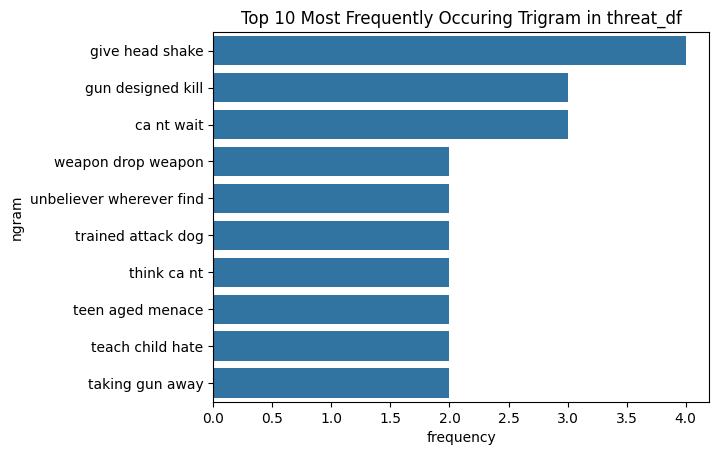

In [62]:
visualization(toxicity_df, 'toxicity_df')
visualization(obscene_df, 'obscene_df')
visualization(sexual_explicit_df, 'sexual_explicit_df')
visualization(identity_attack_df, 'identity_attack_df')
visualization(insult_df, 'insult_df')
visualization(threat_df, 'threat_df')